### Lesson 1

#### Step 1. Gather images
-  Import libraries

In [4]:
from duckduckgo_search import *
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastbook import search_images_ddg

import warnings
warnings.filterwarnings("ignore")

- Define the `search_images()` function using ddg

In [5]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

- Try the function

Searching for 'coriander'
http://upload.wikimedia.org/wikipedia/commons/5/51/A_scene_of_Coriander_leaves.JPG


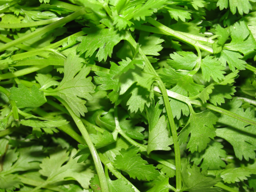

Searching for 'parsley'
http://upload.wikimedia.org/wikipedia/commons/9/97/Parsley.jpg


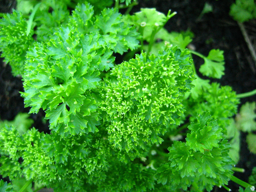

In [6]:
searches = 'coriander','parsley'
path = 'asset-lesson-1'

for o in searches:
    # Demo the search_images() function
    urls = search_images(o, max_images=1)
    print(urls[0])

    # Save the image
    dest = path+'/lesson-1-example-'+o+'.jpg'
    download_url(urls[0], dest, show_progress=False)

    # Show the image
    im = Image.open(dest)
    display(im.to_thumb(256,256))

- Search and save images

In [7]:
path = Path(path)

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(o))
    resize_images(path/o, max_size=400, dest=path/o)

- Remove broken images

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

#### Step 2. Train the model
- Define DataBlock and DataLoader

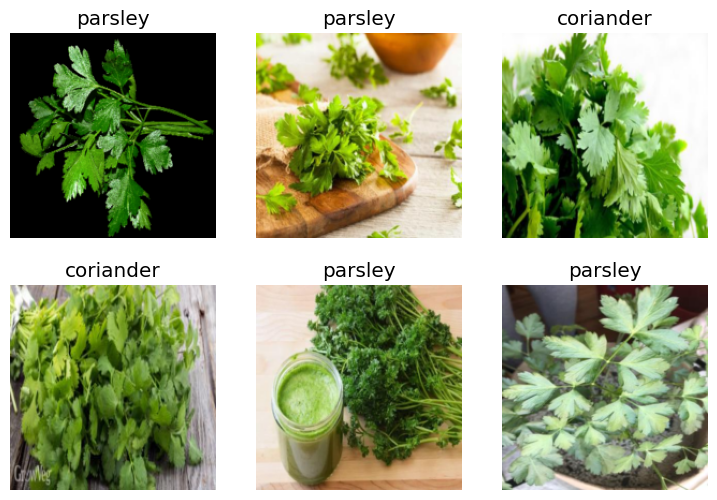

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Define input and output types
    get_items=get_image_files, # Function to retrieve the model input (images)
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Mandatory to have validation sets. Here is using randomsplitter
    get_y=parent_label, # Indicate the labels. Here the parent directory names are the labels of the images
    item_tfms=[Resize(192, method='squish')] # Transformation approaches
).dataloaders(path)

dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.954616,1.562892,0.328947,00:55


epoch,train_loss,valid_loss,accuracy,time
0,1.569366,1.154082,0.486842,01:02
1,1.277631,1.023528,0.578947,01:01
2,1.049918,0.983650,0.644737,01:01
3,0.880185,0.924349,0.697368,01:02
4,0.748722,0.908085,0.684211,01:01
